 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b>

Здравствуй Сергей!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Исследовательский анализ данных

## Описание проекта "Промышленность"

### Описание задачи

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание предметной области

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ок, описание самой проблематики перед её решением - то, что надо!

## Подготовка к выполнению проекта

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 

### Импорт данных

In [2]:
# Путь к директории данных.
PATH__DATA = r'/datasets/final_steel/'

# Полный путь к файлам.
DATA_ARC = PATH__DATA + r'data_arc.csv'
DATA_BULK = PATH__DATA + r'data_bulk.csv'
DATA_BULK_TIME = PATH__DATA + r'data_bulk_time.csv'
DATA_GAS = PATH__DATA + r'data_gas.csv'
DATA_TEMP = PATH__DATA + r'data_temp.csv'
DATA_WIRE = PATH__DATA + r'data_wire.csv'
DATA_WIRE_TIME = PATH__DATA + r'data_wire_time.csv'

### Настройки проекта

In [3]:
# Настройка случайного зерна.
GLOBAL__RANDOM_STATE = 29082022

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>ОК, данные на базе) Идём дальше.

## Анализ данных

### Данные об электродах

In [4]:
# Загрузка данных об электродах.
df_arc = pd.read_csv(DATA_ARC)

In [5]:
# Проверка: вывод первых пяти строк.
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [6]:
# Вывод общей информации о данных.
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [7]:
# Вывод основных статистик данных.
df_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


#### Признак "key"

In [8]:
# Вывод количества записей о партиях.
df_arc['key'].value_counts().head(10)

2108    16
1689    15
1513    15
2567    14
46      13
322     13
1829    12
2916    12
44      12
1958    11
Name: key, dtype: int64

In [9]:
# Вывод количества уникальных партий.
df_arc['key'].nunique()

3214

#### Признак "Активная мощность"

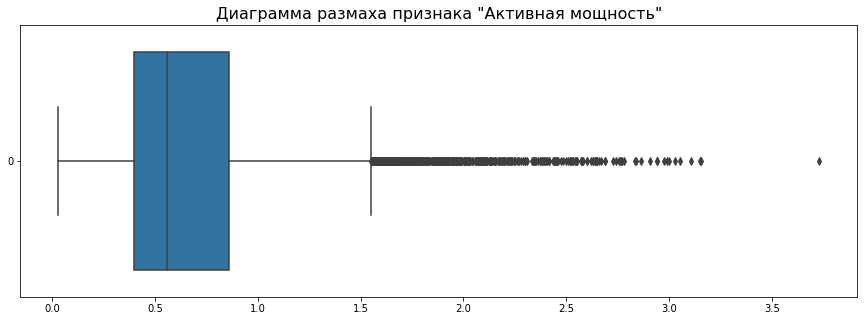

In [10]:
# Диаграмма размаха признака "Активная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Активная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Активная мощность"', fontdict={'size': 16});

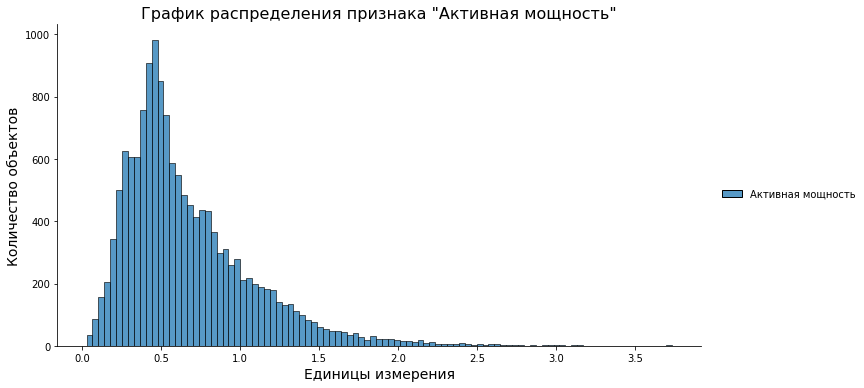

In [11]:
# График распределения признака "Активная мощность".

sns.displot(df_arc[['Активная мощность']], aspect=2)

plt.title('График распределения признака "Активная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>👍</p>
</div>

#### Признак "Реактивная мощность"

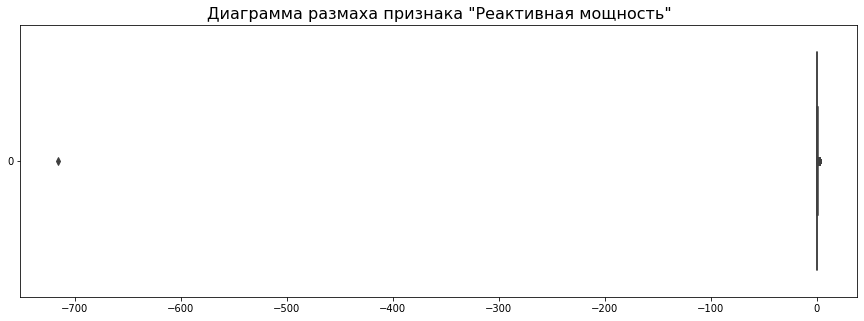

In [12]:
# Диаграмма размаха признака "Реактивная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Реактивная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

##### Эксперимент - применение моделей для поиска аномалий

In [13]:
# Изоляционный лес для поиска аномалий.
outlier_forest = IsolationForest(n_estimators=100, random_state=GLOBAL__RANDOM_STATE) 

In [14]:
# Поиск аномалий.
outlier_predict = outlier_forest.fit_predict(df_arc['Реактивная мощность'].values.reshape(-1, 1))

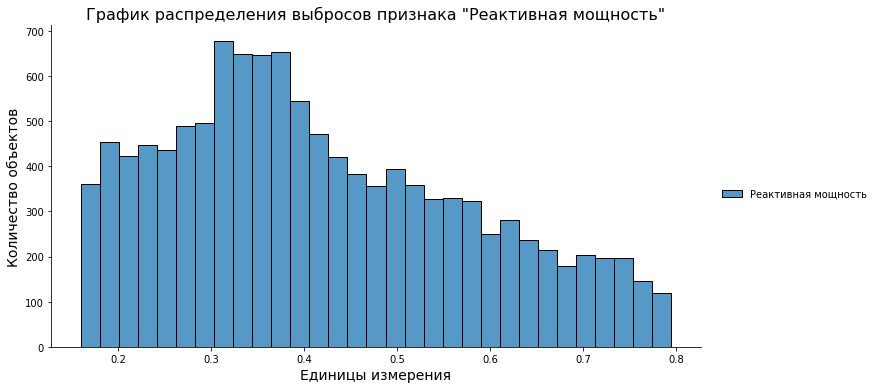

In [15]:
# График распределения выбросов признака "Реактивная мощность".

sns.displot(df_arc[['Реактивная мощность']][(outlier_predict == 1) & (df_arc['Реактивная мощность'] > -700)], aspect=2)

plt.title('График распределения выбросов признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

In [16]:
# Метод ближайших соседей для поиска аномалий.
outlier_knn = KNN(n_jobs=-1)

In [17]:
# Поиск аномалий.
outlier_predict = outlier_knn.fit_predict(df_arc['Реактивная мощность'].values.reshape(-1, 1))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


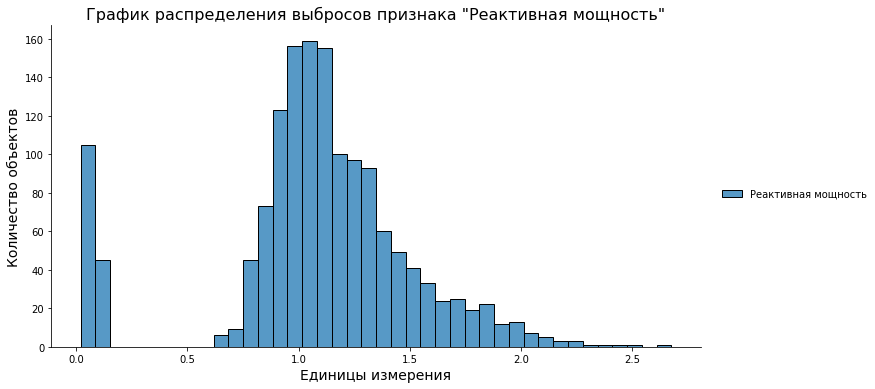

In [18]:
# График распределения выбросов признака "Реактивная мощность".

sns.displot(df_arc[['Реактивная мощность']][(outlier_predict == 1) & (df_arc['Реактивная мощность'] > -700)], aspect=2)

plt.title('График распределения выбросов признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

***Вывод***

Применение моделей машинного обучения для поиска аномалий не показало эффективности, так как большое количество ординарных объектов были помечены как выбросы.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Идея понятна. Но с выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>
    
В самой теории выбросов принято считать, что выбросы в интервале от q_3 + 1.5*irq до q_3 + з*irq - на усмотрение бизнеса. А вот всё, что больше q_3 + 3*irq - уже точно надо работать - на удаление!!!<br>
q_3 - верхняя квартиль<br>
irq - интерквартильный размах

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 выглядит вполне рабочим. В промышленной аналитике чаще всего выбросы - только ошибки датчкиов или выгрузки. В этом проекте, кроме супервыбросов (реактивная и несколько партий с температурой 1200) я бы ничего не удалял. И тогда модель будет с макисмальным рабочим диапазоном.

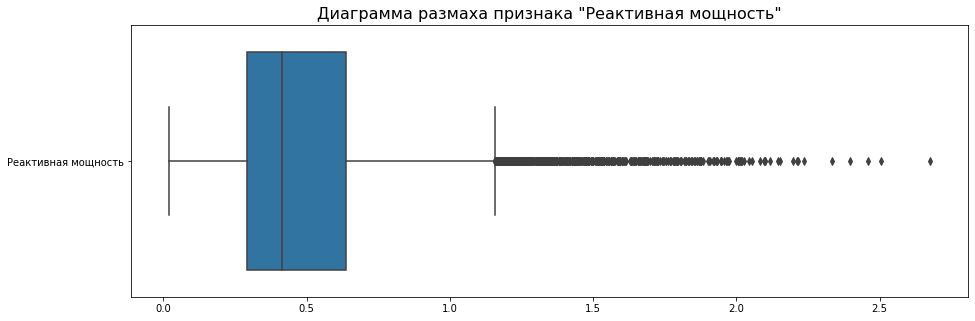

In [19]:
# Диаграмма размаха признака "Реактивная мощность" с фильтрацией.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

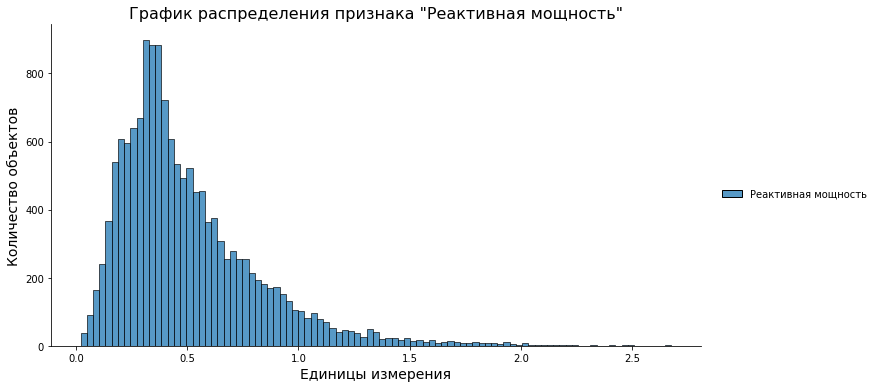

In [20]:
# График распределения признака "Реактивная мощность".

# sns.displot(df_arc[['Реактивная мощность']], aspect=2)
sns.displot(df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], aspect=2)

plt.title('График распределения признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Генерация разности признаков "Начало нагрева дугой" и "Конец нагрева дугой"

In [21]:
# Приведение признака "Конец нагрева дугой" к типу данных datetime64.
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'])

In [22]:
# Приведение признака "Начало нагрева дугой" к типу данных datetime64.
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'])

In [23]:
# Вычисление разницы признаков.
df_arc['time_diff'] = df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']

In [24]:
# Проверка: вывод первых пяти строк.
df_arc['time_diff'].head()

0   0 days 00:03:48
1   0 days 00:03:05
2   0 days 00:02:52
3   0 days 00:06:05
4   0 days 00:02:28
Name: time_diff, dtype: timedelta64[ns]

In [25]:
# Перевод разницы признаков в секунды.
df_arc['time_diff_seconds'] = df_arc['time_diff'].dt.total_seconds()

In [26]:
# Проверка: вывод первых пяти строк.
df_arc['time_diff_seconds'].head()

0    228.0
1    185.0
2    172.0
3    365.0
4    148.0
Name: time_diff_seconds, dtype: float64

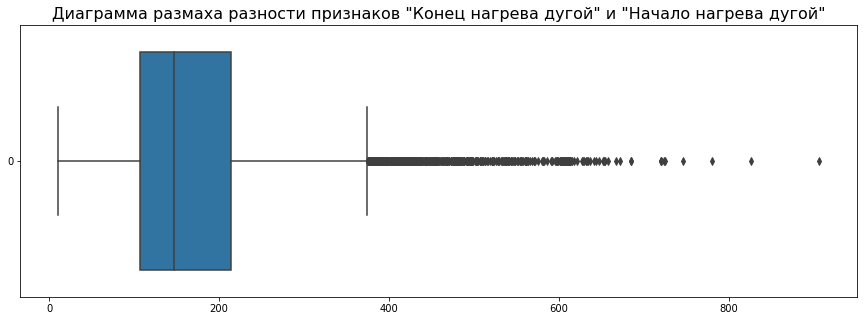

In [27]:
# Диаграмма размаха разности признаков.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['time_diff_seconds'], orient='h')

plt.title('Диаграмма размаха разности признаков "Конец нагрева дугой" и "Начало нагрева дугой"', fontdict={'size': 16});

In [28]:
# Вывод основных статистик разницы признаков в секундах.
df_arc['time_diff_seconds'].describe()

count    14876.000000
mean       171.670946
std         98.186803
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: time_diff_seconds, dtype: float64

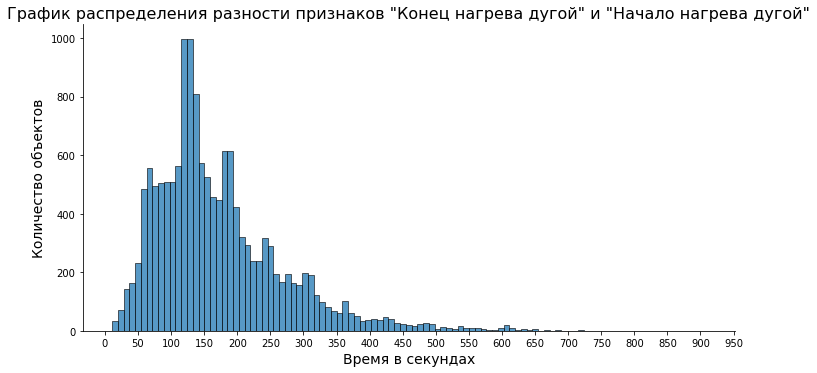

In [29]:
# График распределения разности признаков.

sns.displot(df_arc['time_diff_seconds'], aspect=2)

plt.xticks(range(0, 1000, 50))

plt.title('График распределения разности признаков "Конец нагрева дугой" и "Начало нагрева дугой"', fontdict={'size': 16})
plt.xlabel('Время в секундах', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Агрегация данных по партиям

In [30]:
# Агрегация данных по партиям.
df_arc_agg = df_arc.groupby(by='key').sum()

In [31]:
# Проверка: вывод первых пяти строк.
df_arc_agg.head()

,Активная мощность,Реактивная мощность,time_diff_seconds
key,,,
1,4.878147,3.183241,1098.0
2,3.052598,1.998112,811.0
3,2.525882,1.599076,655.0
4,3.209250,2.060298,741.0
5,3.347173,2.252643,869.0


In [32]:
# Вывод основных статистик данных.
df_arc_agg.describe()

,Активная мощность,Реактивная мощность,time_diff_seconds
count,3214.000000,3214.000000,3214.000000
mean,3.103138,2.094821,794.579029
std,1.397390,12.689508,332.448622
min,0.186226,-714.591636,57.000000
25%,2.126339,1.599018,571.000000
50%,2.990537,2.229869,770.000000
75%,3.901147,2.899141,983.000000
max,17.496497,12.587990,4189.000000


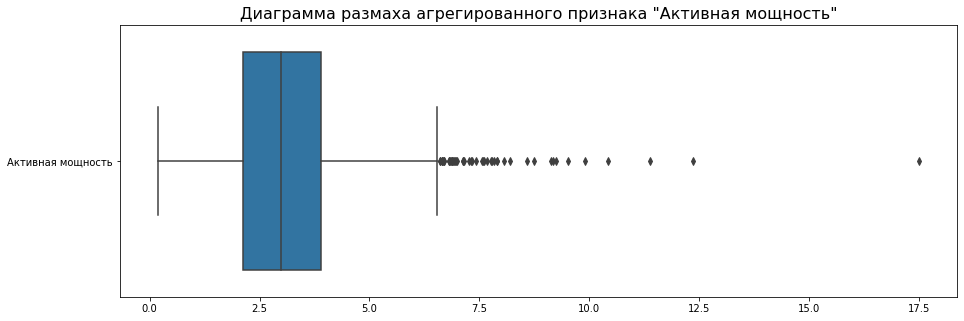

In [33]:
# Диаграмма размаха агрегированного признака "Активная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Активная мощность']], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Активная мощность"', fontdict={'size': 16});

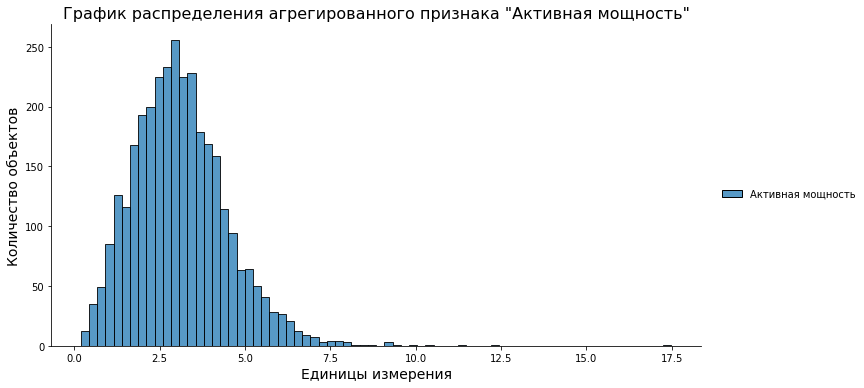

In [34]:
# График распределения агрегированного признака "Активная мощность".

sns.displot(df_arc_agg[['Активная мощность']], aspect=2)

plt.title('График распределения агрегированного признака "Активная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

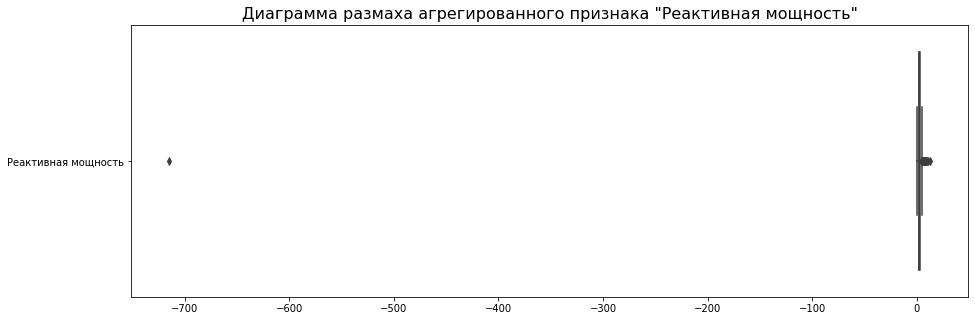

In [35]:
# Диаграмма размаха агрегированного признака "Реактивная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Реактивная мощность']], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Реактивная мощность"', fontdict={'size': 16});

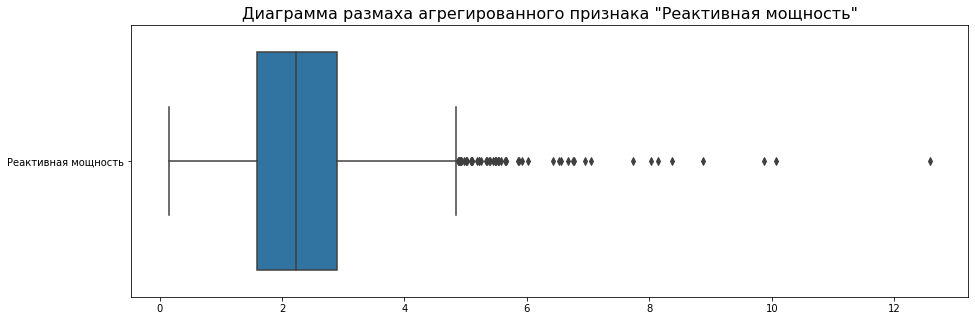

In [36]:
# Диаграмма размаха агрегированного признака "Реактивная мощность" с фильтрацией.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Реактивная мощность']][df_arc_agg['Реактивная мощность'] > -700], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Реактивная мощность"', fontdict={'size': 16});

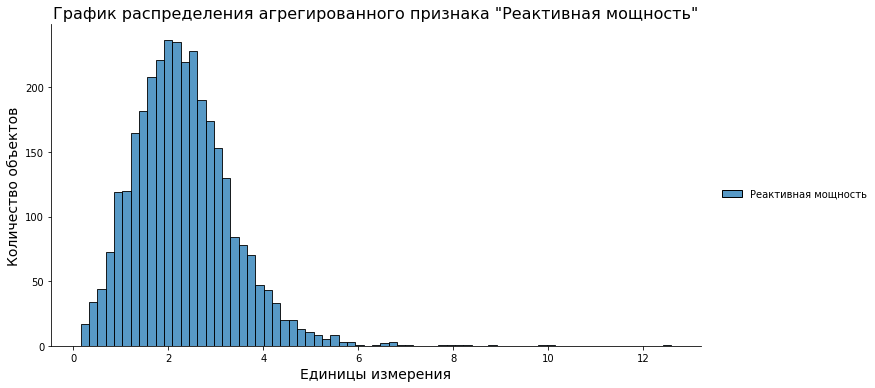

In [37]:
# График распределения агрегированного признака "Реактивная мощность".

sns.displot(df_arc_agg[['Реактивная мощность']][df_arc_agg['Реактивная мощность'] > -700], aspect=2)

plt.title('График распределения агрегированного признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

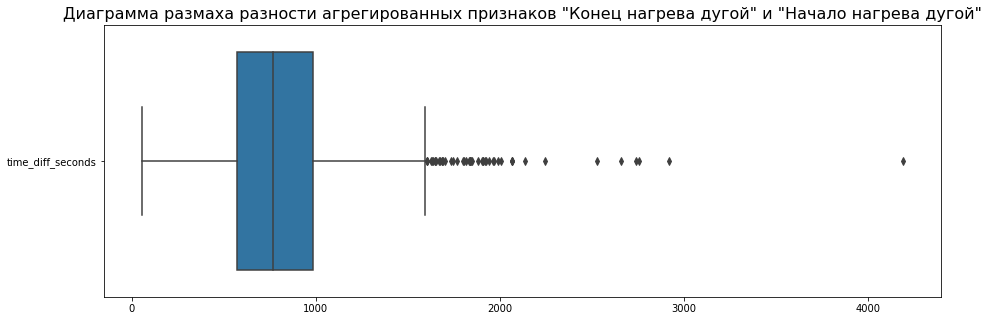

In [38]:
# Диаграмма размаха разности агрегированных признаков.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['time_diff_seconds']], orient='h')

plt.title(
    'Диаграмма размаха разности агрегированных признаков "Конец нагрева дугой" и "Начало нагрева дугой"',
    fontdict={'size': 16}
);

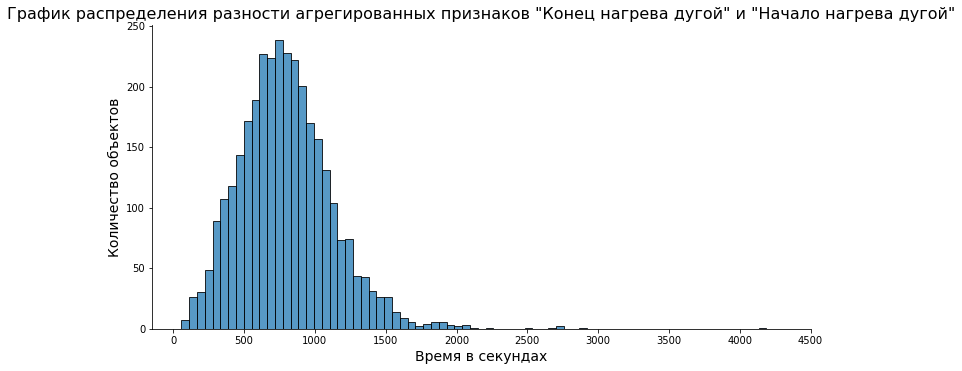

In [39]:
# График распределения разности агрегированных признаков.

sns.displot(df_arc_agg['time_diff_seconds'], aspect=2)

plt.xticks(range(0, 5000, 500))

plt.title(
    'График распределения разности агрегированных признаков "Конец нагрева дугой" и "Начало нагрева дугой"',
    fontdict={'size': 16}
)

plt.xlabel('Время в секундах', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных об электродах `data_arc.csv` было установлено следующее:


1. Данные не содержат пропусков.


2. Данные могут содержать аномалии. Так, в случае с признаком `Реактивная мощность`, было обнаружено сильно выбивающееся значение < -700, что с высокой вероятностью может быть выбросом. Диаграмма размаха для данного признака также показала наличие выбросов в области значений от 1.2 до 2.7. Однако доподлинно неизвестно, могут ли значения вне границ также быть выбросами.


3. Диаграмма размаха значений признака `Активная мощность` также показала наличие выбросов вне верхнего интервала, значения более 1.5. Характер данных не позволяет однозначно определить аномалии это или нет.


4. На основе признаков `Конец нагрева дугой` и `Начало нагрева дугой` был сгенерирован новый признак `time_diff_seconds`, который отражает разность признаков в секундах. Согласно диаграмме размаха нового признака, значения более ~380 секунд являются выбивающимися. Большинство значений сгруппировано в интервале от 50 до 250 секунд.


5. Из-за итеративной обработки некоторые партии сырья содержат несколько записей об электродах, что позволило выполнить агрегацию по номеру партии `key`.


6. Агрегация данных показала наличие партий с суммарной продолжительностью нагрева более 1 часа, что является выбивающимся значением при средней продолжительности нагрева не более получаса. Данная партия с высокой долей вероятности является аномалией.


7. Применение моделей машинного обучения для поиска аномалий не показало эффективности, так как большое количество ординарных объектов были помечены как выбросы

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
МОЛОДЕЦ, чёткая работа с анализом данных.По выбросам - напиал своё суждение)

### Данные о подаче сыпучих материалов (объём)

In [40]:
# Загрузка данных о подаче сыпучих материалов (объём).
df_bulk = pd.read_csv(DATA_BULK)

In [41]:
# Проверка: вывод первых пяти строк.
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [42]:
# Вывод общей информации о данных.
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [43]:
# Вывод основных статистик данных.
df_bulk[df_bulk.columns[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0
Bulk 10,176.0,83.284091,26.060347,24.0,64.00,86.5,102.00,159.0


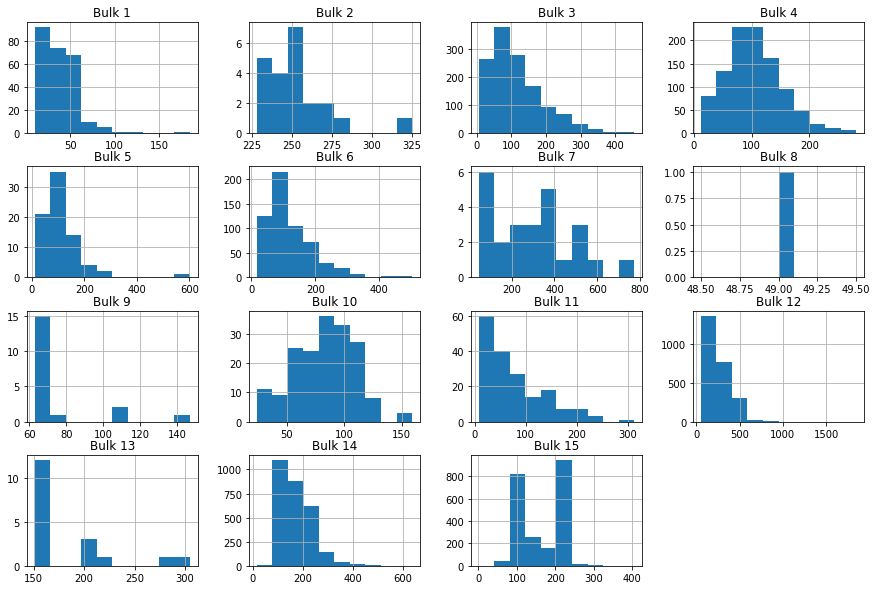

In [44]:
# Построение графиков распределения значений всех признаков.
df_bulk[df_bulk.columns[1:]].hist(figsize=(15, 10));

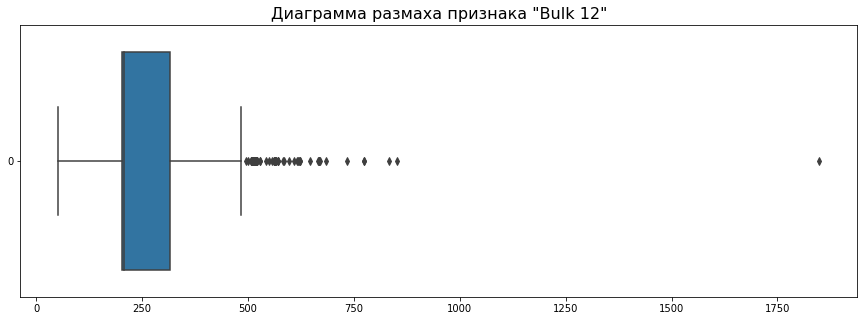

In [45]:
# Диаграмма размаха признака "Bulk 12".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_bulk['Bulk 12'], orient='h')

plt.title('Диаграмма размаха признака "Bulk 12"', fontdict={'size': 16});

#### Признак "key"

In [46]:
# Вывод количества записей о партиях.
df_bulk['key'].value_counts().head(10)

2049    1
2612    1
2588    1
541     1
2590    1
543     1
2592    1
545     1
2594    1
547     1
Name: key, dtype: int64

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
это не признак, его в модель не стоит вводить. Это просто набор чисел.

In [47]:
# Вывод количества уникальных партий.
df_bulk['key'].nunique()

3129

#### Пропуски

In [48]:
# Вывод информации об объектах с пропусками.
pd.DataFrame(
    pd.concat([
        df_bulk.isna().sum(1).value_counts(),
        df_bulk.isna().sum(1).value_counts(normalize=True).apply(lambda x: f'{x:.2%}')
    ], axis=1)
).rename(columns={0: 'Количество объектов', 1: 'Доля объектов'})

,Количество объектов,Доля объектов
11,1439,45.99%
10,510,16.30%
12,500,15.98%
13,312,9.97%
14,296,9.46%
9,71,2.27%
8,1,0.03%


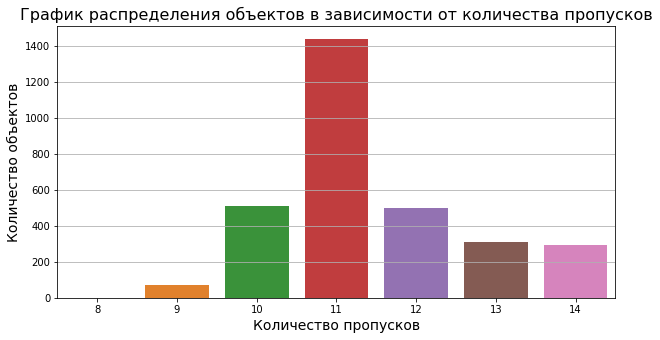

In [49]:
# График распределения объектов в зависимости от количества пропусков.
plt.figure(figsize=(10, 5))

sns.barplot(
    x=[*df_bulk.isna().sum(1).value_counts().index],
    y=[*df_bulk.isna().sum(1).value_counts().values]
)

plt.grid(axis='y')

plt.title('График распределения объектов в зависимости от количества пропусков', fontdict={'size': 16})
plt.xlabel('Количество пропусков', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о подаче сыпучих материалов (объём) `data_bulk.csv` было установлено следующее:


1. Данные содержат пропуски. Большинство объектов, чуть менее половины всей выборки, имеют 11 пропусков в 15 признаках. Остальные объекты имеют от 8 до 14 пропусков. Данные пропуски могут быть интерпретированы как отсутствие информации о подаче матриалов. Таким образом, пропуски могут быть заполнены нулевыми значениями.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой. Также разные партии имеют разное количество итераций подачи сыпучих материалов.


3. Количество уникальных номеров партий `key` меньше, чем в данных об электродах. Это значит, что не для всех партий имеются данные о подаче сыпучих материалов.


4. Анализ основных статистик и диаграммы размаха признака `df_bulk` позволил установить наличие выброса со значением 1849 единиц, что значительно отличается от основной массы объектов в данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С аналитикой понятно. Напомню, что кей - не бизнес-признак, его использовать не надо.

### Данные о подаче сыпучих материалов (время)

In [50]:
# Загрузка данных о подаче сыпучих материалов (время).
df_bulk_time = pd.read_csv(DATA_BULK_TIME)

In [51]:
# Проверка: вывод первых пяти строк.
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [52]:
# Приведение типов данных к datetime64.
for column in df_bulk_time.columns[1:]:
    df_bulk_time[column] = pd.to_datetime(df_bulk_time[column])

In [53]:
# Вывод общей информации о данных.
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [54]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 14'.
(df_bulk_time['Bulk 12'] == df_bulk_time['Bulk 14']).sum()

2307

In [55]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 15'.
(df_bulk_time['Bulk 12'] == df_bulk_time['Bulk 15']).sum()

2153

In [56]:
# Количество объектов, где время 'Bulk 4' больше времени 'Bulk 12'.
(df_bulk_time['Bulk 4'] > df_bulk_time['Bulk 12']).sum()

803

#### Выводы

В ходе анализа данных о подаче сыпучих материалов (время) `data_bulk_time.csv` было установлено следующее:


1. Данные содержат пропуски.


2. Данные противоречивы: существенная часть записей имеет дублирующиеся значения признаков, а в некоторых случаях хронология нарушена.


Таким образом, ценность данной ифнормации может быть поставлена под сомнение.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
точно)

### Данные о продувке сплава газом

In [57]:
# Загрузка данных о подаче сыпучих материалов (время).
df_gas = pd.read_csv(DATA_GAS)

In [58]:
# Проверка: вывод первых пяти строк.
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [59]:
# Вывод общей информации о данных.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [60]:
# Вывод основных статистик данных.
df_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


#### Признак "key"

In [61]:
# Вывод количества записей о партиях.
df_gas['key'].value_counts().head(10)

2049    1
3135    1
3115    1
1070    1
3119    1
1074    1
3123    1
1078    1
3127    1
1082    1
Name: key, dtype: int64

In [62]:
# Вывод количества уникальных партий.
df_gas['key'].nunique()

3239

#### Признак "Газ 1"

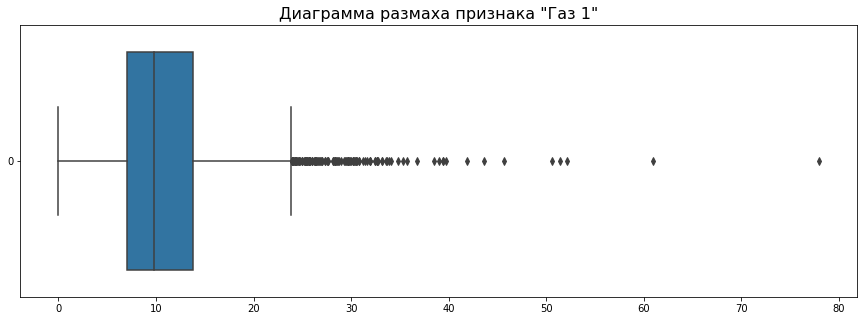

In [63]:
# Диаграмма размаха признака "Газ 1".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_gas['Газ 1'], orient='h')

plt.title('Диаграмма размаха признака "Газ 1"', fontdict={'size': 16});

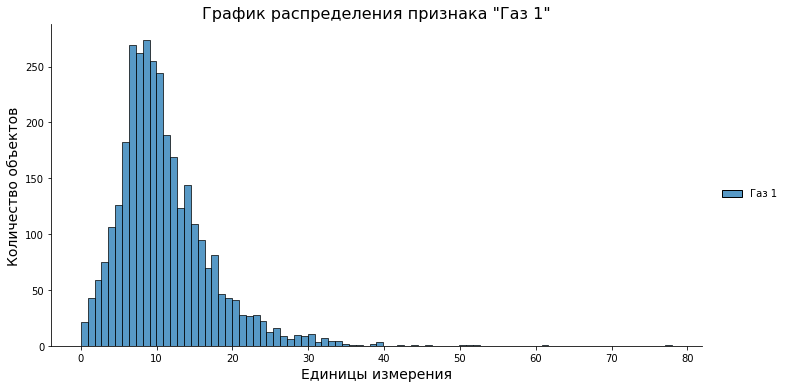

In [64]:
# График распределения признака "Газ 1".

sns.displot(df_gas[['Газ 1']], aspect=2)

plt.title('График распределения признака "Газ 1"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о продувке сплава газом `data_gas.csv` было установлено следующее:


1. Данные не содержат пропусков.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой.


3. Количество уникальных номеров партий `key` превосходит аналогичный показатель у данных об электродах и сыпучих материалов. Это значит, что не все партии с газом будут востребованы.


4. Диаграмма размаха признака `Газ 1` показала наличие выбросов. При этом вне границ наблюдаются сгруппированные значения до отметки 50 единиц. Данные значения соответствуют тенденции графика плавного убывания количества объектов с ростом единиц измерения. Также присутствуют разрозненные значения в интервале от 50 до 80 единиц измерения, которые малочисленны и сильно контрастируют на фоне основного скопления объектов. Данные значения являются выбросами.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
тааааак, принято. (кроме кей))

### Данные о проволочных материалах (объём)

In [65]:
# Загрузка данных о проволочных материалах (объём).
df_wire = pd.read_csv(DATA_WIRE)

In [66]:
# Проверка: вывод первых пяти строк.
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Вывод общей информации о данных.
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [68]:
# Вывод основных статистик данных.
df_wire[df_wire.columns[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


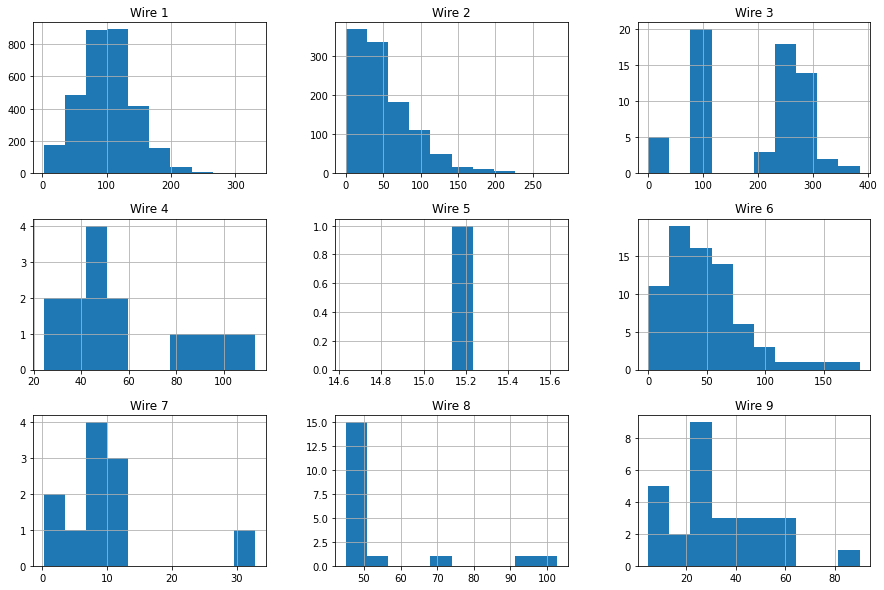

In [69]:
# Построение графиков распределения значений всех признаков.
df_wire[df_wire.columns[1:]].hist(figsize=(15, 10));

#### Признак "key"

In [70]:
# Вывод количества записей о партиях.
df_wire['key'].value_counts().head(10)

2049    1
2664    1
2590    1
543     1
2592    1
545     1
2594    1
547     1
2596    1
549     1
Name: key, dtype: int64

In [71]:
# Вывод количества уникальных партий.
df_wire['key'].nunique()

3081

#### Пропуски

In [72]:
# Вывод информации об объектах с пропусками.
pd.DataFrame(
    pd.concat([
        df_wire.isna().sum(1).value_counts(),
        df_wire.isna().sum(1).value_counts(normalize=True).apply(lambda x: f'{x:.2%}')
    ], axis=1)
).rename(columns={0: 'Количество объектов', 1: 'Доля объектов'})

,Количество объектов,Доля объектов
8,1936,62.84%
7,1045,33.92%
6,88,2.86%
4,6,0.19%
5,6,0.19%


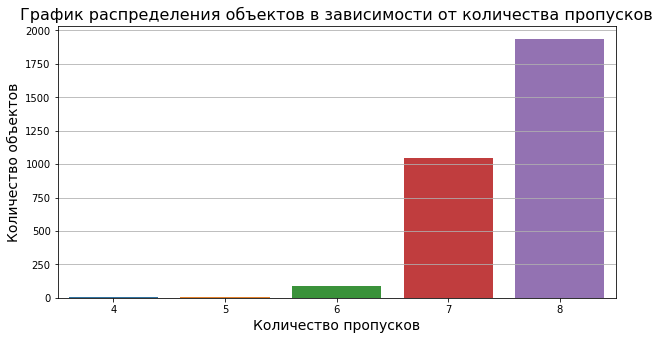

In [73]:
# График распределения объектов в зависимости от количества пропусков.
plt.figure(figsize=(10, 5))

sns.barplot(
    x=[*df_wire.isna().sum(1).value_counts().index],
    y=[*df_wire.isna().sum(1).value_counts().values]
)

plt.grid(axis='y')

plt.title('График распределения объектов в зависимости от количества пропусков', fontdict={'size': 16})
plt.xlabel('Количество пропусков', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о проволочных материалах (объём) `data_wire.csv` было установлено следующее:


1. Данные содержат пропуски. Большинство объектов, чуть менее двух третей всей выборки, имеют 8 пропусков в 9 признаках. Остальные объекты имеют от 4 до 7 пропусков. Данные пропуски могут быть интерпретированы как отсутствие информации о подаче матриалов. Таким образом, пропуски могут быть заполнены нулевыми значениями.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой. Также разные партии имеют разное количество итераций подачи проволочных материалов.


3. Количество уникальных номеров партий `key` меньше, чем в данных об электродах, подаче сыпучих материалов и продувке сплава газом. Это значит, что не для всех партий имеются данные о подаче проволочных материалов.

### Данные о проволочных материалах (время)

In [74]:
# Загрузка данных о проволочных материалах (объём).
df_wire_time = pd.read_csv(DATA_WIRE_TIME)

In [75]:
# Проверка: вывод первых пяти строк.
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Приведение типов данных к datetime64.
for column in df_wire_time.columns[1:]:
    df_wire_time[column] = pd.to_datetime(df_wire_time[column])

In [77]:
# Вывод общей информации о данных.
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [78]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 14'.
(df_wire_time['Wire 1'] >= df_wire_time['Wire 2']).sum()

25

#### Выводы

В ходе анализа данных о проволочных материалах (время) `data_wire_time.csv` было установлено следующее:


1. Данные содержат пропуски.


2. Часть данных противоречива: в некоторых случаях хронология нарушена.


В большинстве случаев, две трети объектов всей выборки, указана только одна дата и время. Также в большинстве случаев номер признака отражает хронологию подачи материалов. Данные обстоятельства ставят под сомнение полезность данных о времени подачи материалов.

### Данные о результатах измерения температуры

In [79]:
# Загрузка данных о результатах измерения температуры.
df_temp = pd.read_csv(DATA_TEMP)

In [80]:
# Проверка: вывод первых пяти строк.
df_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [81]:
# Приведение типов данных к datetime64.
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])

In [82]:
# Вывод общей информации о данных.
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [83]:
# Вывод основных статистик данных.
df_temp[df_temp.columns[1:]].describe()

,Температура
count,13006.000000
mean,1591.840920
std,21.375851
min,1191.000000
25%,1581.000000
50%,1591.000000
75%,1601.000000
max,1705.000000


#### Признак "key"

In [84]:
# Вывод количества записей о партиях.
df_temp['key'].value_counts().head(10)

46      16
1214    16
1513    16
44      16
1689    15
2108    15
877     14
1051    13
2770    13
2567    13
Name: key, dtype: int64

In [85]:
# Вывод количества уникальных партий.
df_temp['key'].nunique()

3216

#### Признак "Температура"

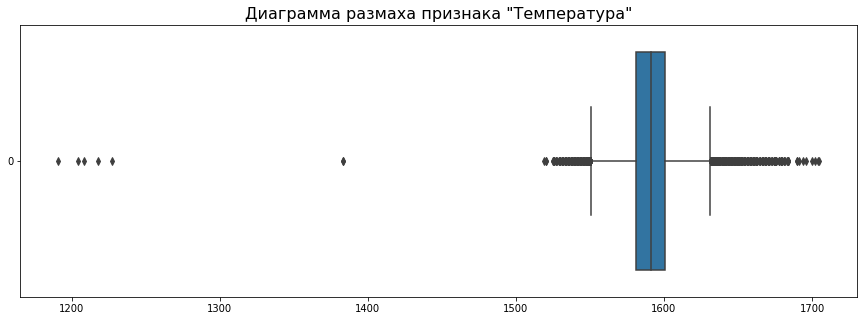

In [86]:
# Диаграмма размаха признака "Температура".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_temp['Температура'], orient='h')

plt.title('Диаграмма размаха признака "Температура"', fontdict={'size': 16});

In [87]:
# Вывод выбросов.
df_temp['Температура'][df_temp['Температура'] < 1400]

4350     1191.0
5978     1208.0
7958     1218.0
8913     1383.0
8914     1383.0
10127    1227.0
12564    1204.0
Name: Температура, dtype: float64

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Как и писал выше, отсечка 1500 кажется завышенной. Т.к. температура плавления около 1400 по паспорту)

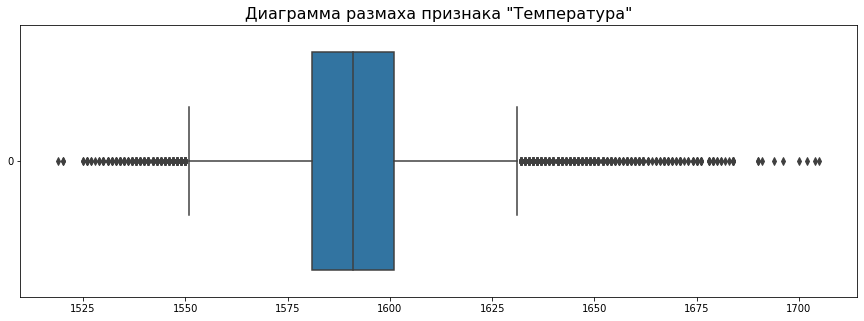

In [88]:
# Диаграмма размаха признака "Температура".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_temp['Температура'][df_temp['Температура'] > 1400], orient='h')

plt.title('Диаграмма размаха признака "Температура"', fontdict={'size': 16});

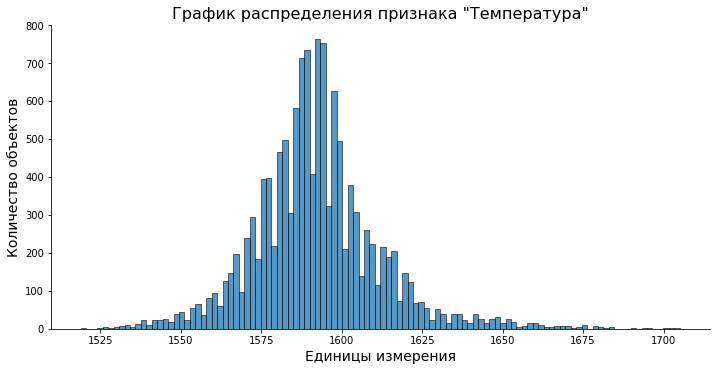

In [89]:
# График распределения признака "Температура".

sns.displot(df_temp['Температура'][df_temp['Температура'] > 1500], aspect=2)

plt.title('График распределения признака "Температура"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о результатах измерения температуры `data_temp.csv` было установлено следующее:


1. Данные содержат пропуски. Логическое заполнение пропусков невозможно и приведёт к искажению тенденций в данных. Поэтому пропуски следует исключить.


2. Согласно диаграмме размаха и графику распределения признака `Температура`, в выборке содержатся выбросы. Причём большинство выбросов сгруппированы у границ интервала и могут быть объяснены распределением - редкие пограничные значения с двух сторон графика. Однако малочисленная часть значений, 6 штук, значительно контрастируют на фоне основного скопления объектов. Данные значения с высокой долей вероятности являются аномальными и также должны быть исключены из выборки.


3. Из-за итеративной обработки некоторые партии сырья содержат несколько записей о результатах измерения температуры. Начальная температура может быть использована как признак, конечная температура - целевая переменная.

# План выполнения проекта

Изучение предметной области, а также исследовательский анализ данных позволили установить требуемые критерии подготовки исходных данных, а также сформировать задачу машинного обучения - прогноз финальной температуры сырья.

**План**

1. Подготовка данных:
    - обработка пропусков;
    - обработка выбросов;
    - приведение типов данных;
    - генерация новых признаков;
    - подготовка широкой таблицы признаков;
    - проверка на коллинеарность;
    - разбиение на обучающую и тестовую выборки.


2. Построение модели машинного обучения:
    - формирование задачи и критерия оценки;
    - рассмотрение кандидатов для решения задачи;
    - индивидуальная подготовка признаков для моделей;
    - построение и валидация, выбор лучшей модели;
    - анализ важности признаков;
    - тестирование лучшей модели.


3. Документирование полученных результатов:
    - описание проекта и данных;
    - описание модели.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Сергей, с первичным анализом - всё как надо получилось: и аналитика и графика.<br>
И выводы логичные. Замечу только, что при удалении пустот в целевой - удалять лучше всю партию.<br>
    
Оставил несколько комментариев, посомтри, пожалуйста.<br> 
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя). А по выборкам так: мы договорились, что будет использовать кросс-валидацию. И тогда валидационная выборка нам и не нужна. ТОлько трайн и тест.<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в слаке сможем встретиться.

In [124]:
# Загрузка данных о результатах измерения температуры.
df_temp = pd.read_csv(DATA_TEMP)

# Приведение типов данных к datetime64.
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])

In [125]:
# Удаление пропусков.
df_temp = df_temp.dropna()

In [126]:
# Фильтрация партий, где указано больше одной температуры.
keys = df_temp.groupby(by='key').count()
keys = keys[keys['Температура'] > 1]
df_temp = df_temp[df_temp['key'].isin(keys.index)]

In [127]:
# Минимальное время замера для каждоый партии.
df_temp = df_temp.join(
    df_temp.groupby(by='key')['Время замера'].min(),
    on='key',
    how='left',
    rsuffix=' первое'
)

# Максимальное время замера для каждой партии.
df_temp = df_temp.join(
    df_temp.groupby(by='key')['Время замера'].max(),
    on='key',
    how='left',
    rsuffix=' последнее'
)

# Формирование датасета, где только первый и последний замеры.
df = pd.merge(
    left=df_temp[df_temp['Время замера'] == df_temp['Время замера первое']][['key', 'Температура']],
    right=df_temp[df_temp['Время замера'] == df_temp['Время замера последнее']][['key', 'Температура']],
    on='key',
    suffixes=(' первая', ' последняя')
)

In [129]:
# Проверка: вывод первых пяти строк.
df.head()

,key,Температура первая,Температура последняя
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
